In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
import pandas as pd
from typing import Dict, List

import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))



In [3]:
# Load all results
# only depth 1
results_dir = Path("../results_losses_moon")
loss_names = ["pre_determine_inner", "log_likelihood_micro", "log_likelihood_macro", "trace_distance", 
            	"hilbert_schmidt", "inner_product"]

data = {loss: [] for loss in loss_names}

for loss_name in loss_names:
    pattern = f"tqfm_{loss_name}_depth1_*.pkl"
    files = sorted(results_dir.glob(pattern))
    print(f"{loss_name}: {len(files)} runs found")
    
    for file in files:
        try:
            with open(file, 'rb') as f:
                data[loss_name].append(pickle.load(f))
        except Exception as e:
            print(f"  Warning: Failed to load {file.name}: {e}")

print("\n✓ Data loaded successfully")
for loss_name in loss_names:
    print(f"  {loss_name}: {len(data[loss_name])} runs")
    
num_runs = min(len(data[loss_name]) for loss_name in loss_names)
print(f"\nUsing {num_runs} runs for analysis (minimum across losses)")

pre_determine_inner: 20 runs found
log_likelihood_micro: 20 runs found
log_likelihood_macro: 20 runs found
trace_distance: 20 runs found
hilbert_schmidt: 20 runs found
inner_product: 20 runs found

✓ Data loaded successfully
  pre_determine_inner: 20 runs
  log_likelihood_micro: 20 runs
  log_likelihood_macro: 20 runs
  trace_distance: 20 runs
  hilbert_schmidt: 20 runs
  inner_product: 20 runs

Using 20 runs for analysis (minimum across losses)


## Accuracy

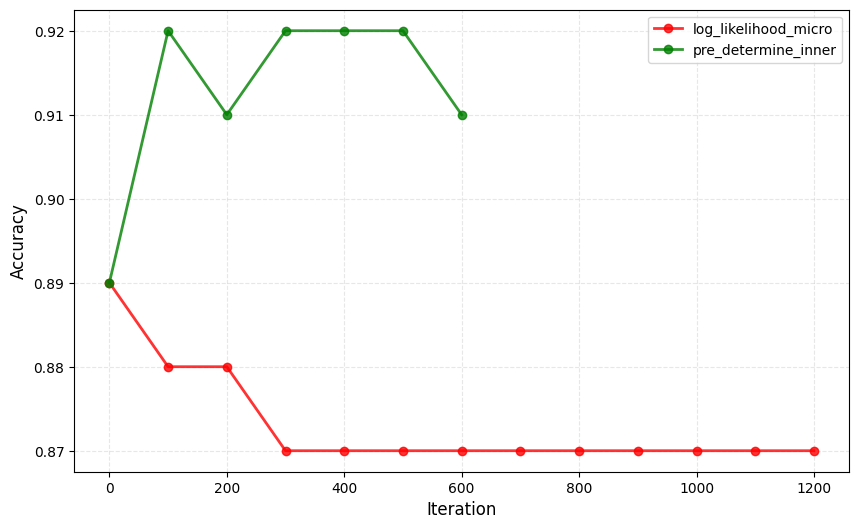

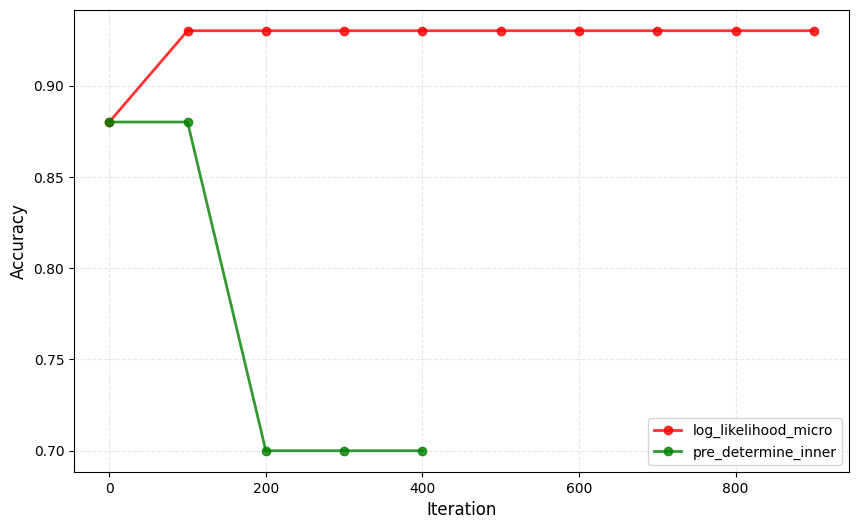

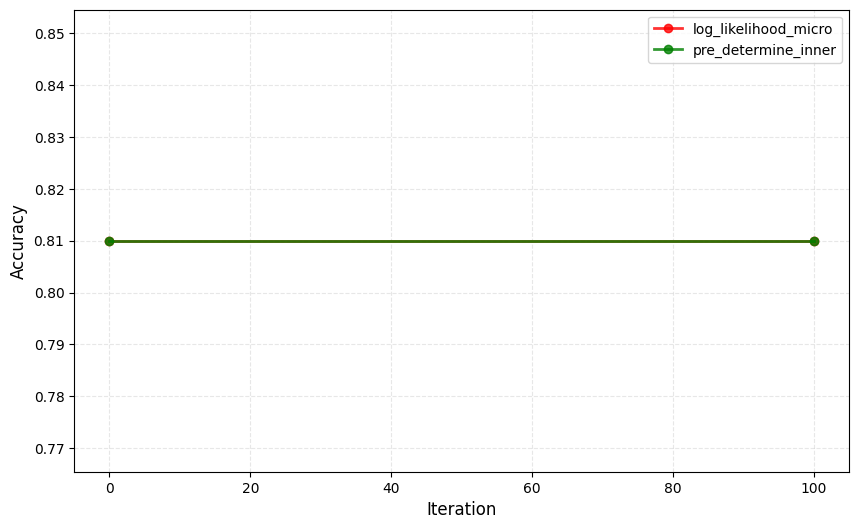

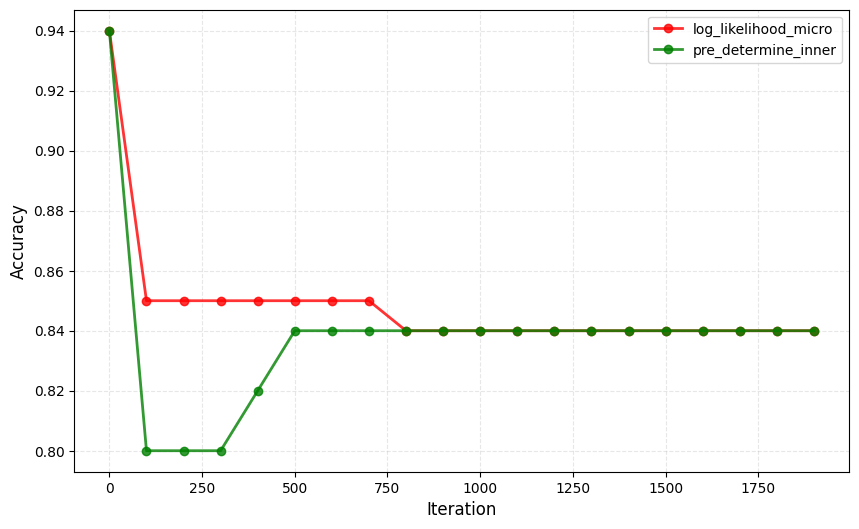

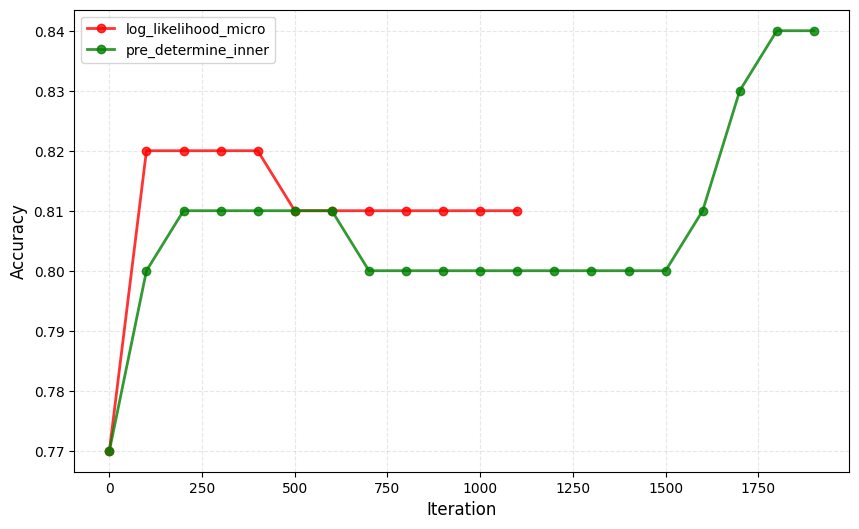

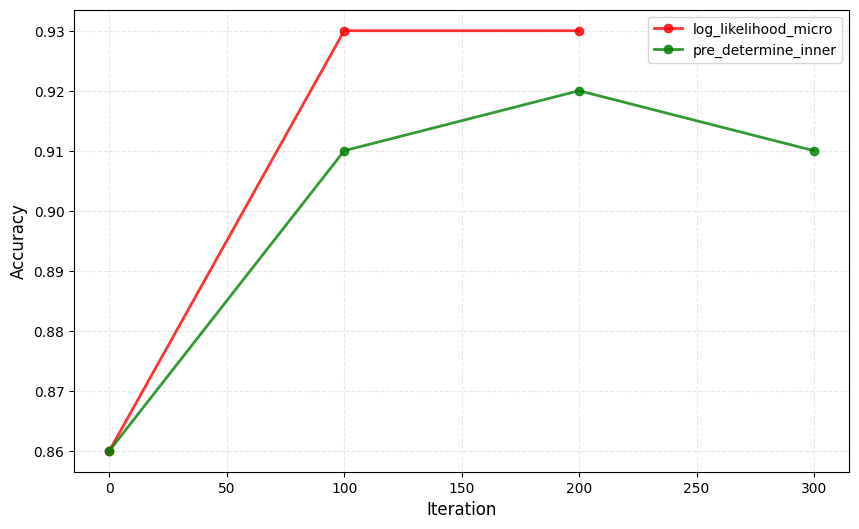

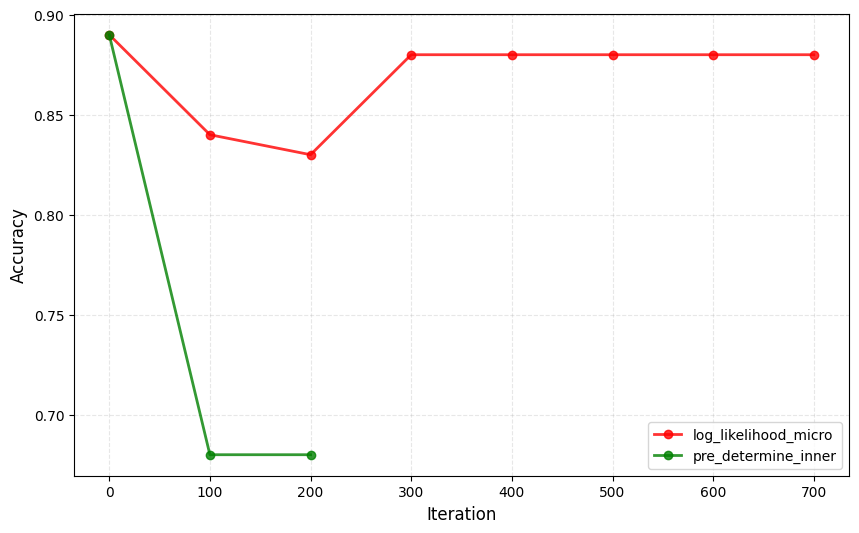

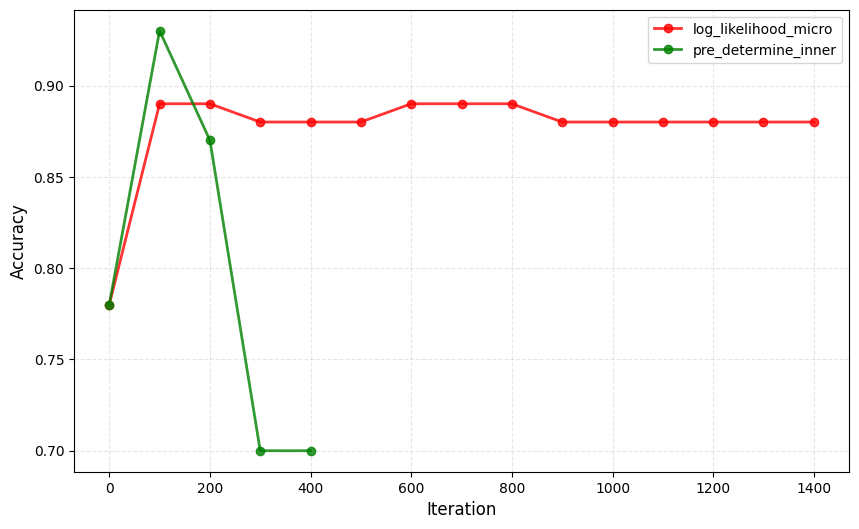

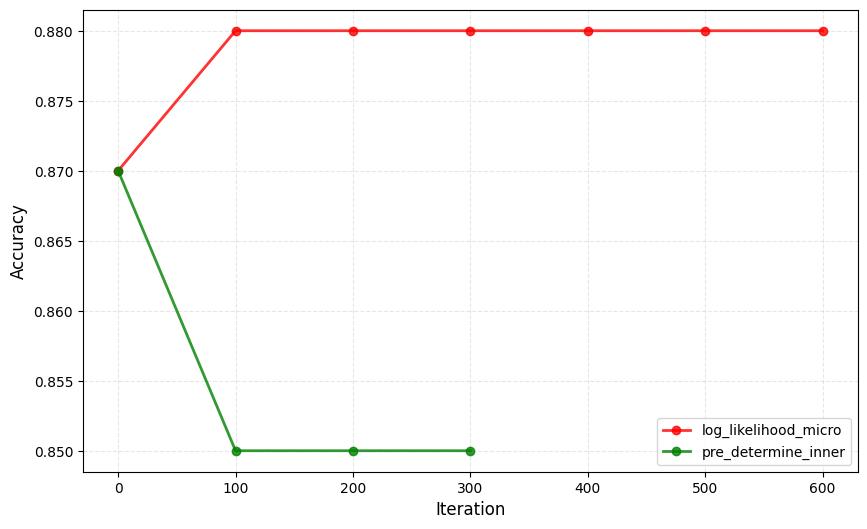

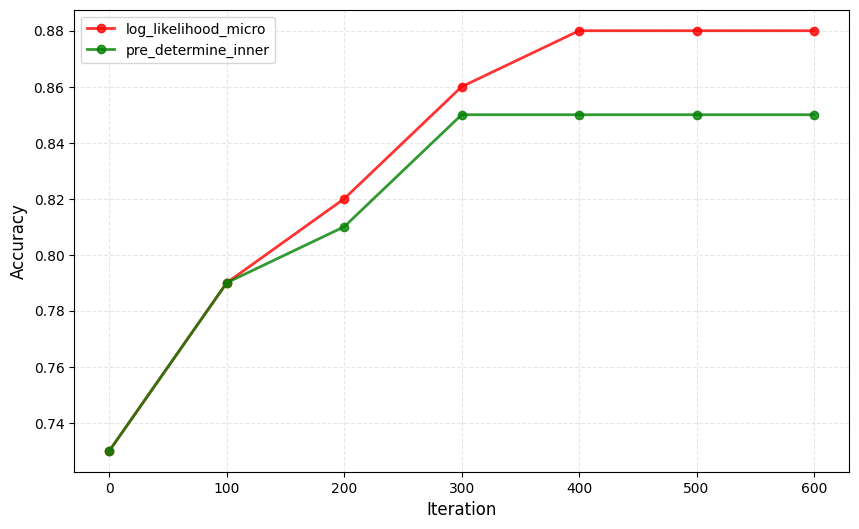

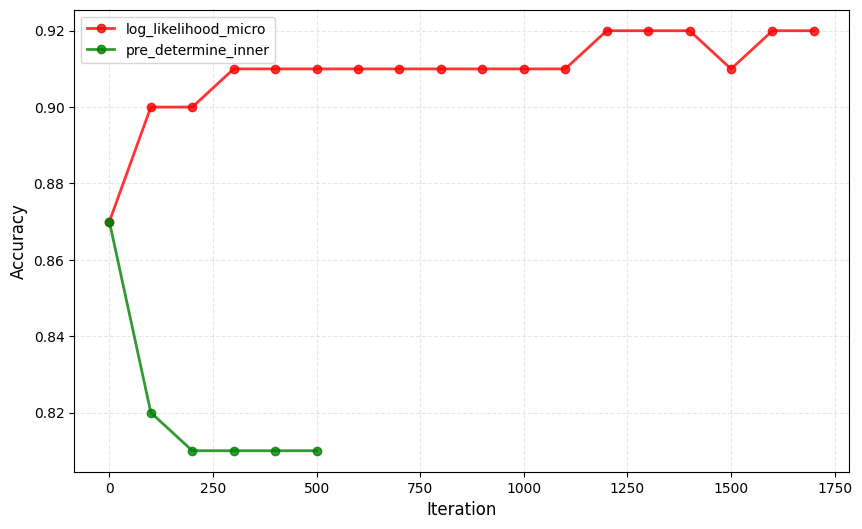

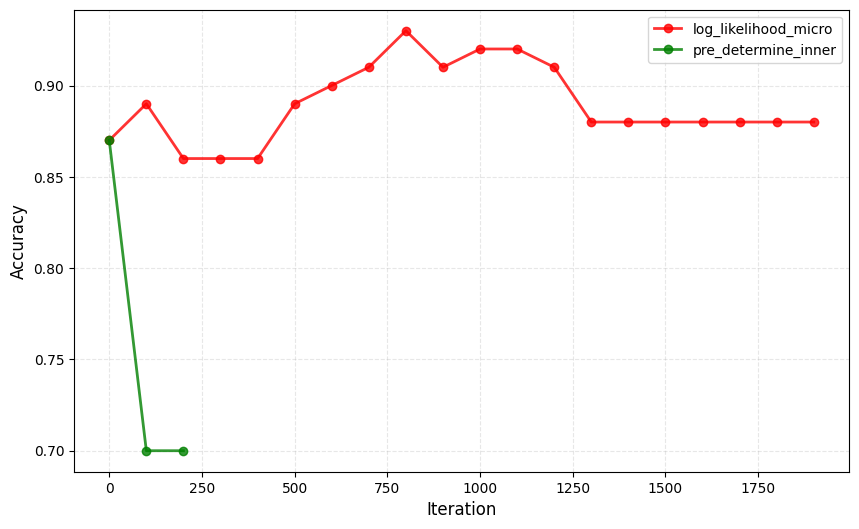

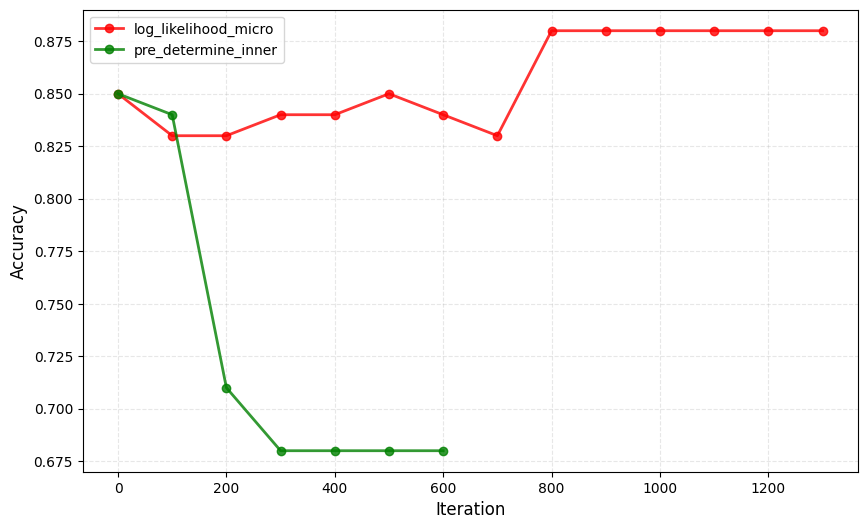

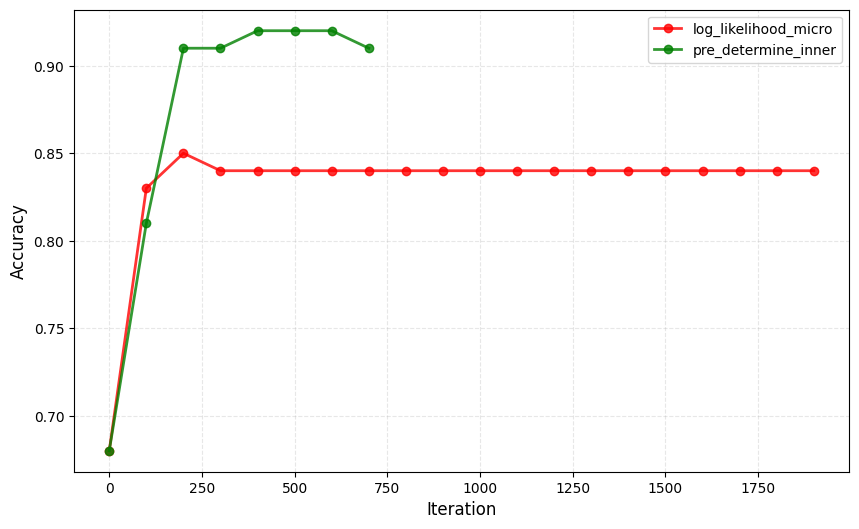

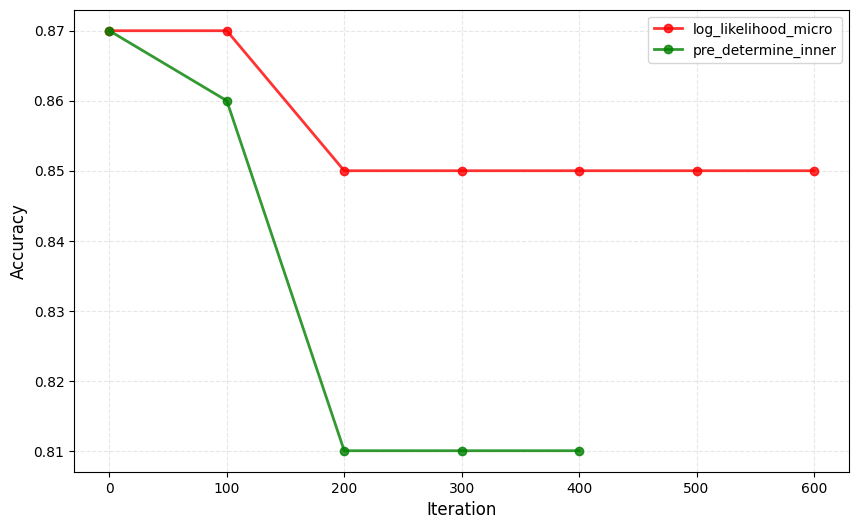

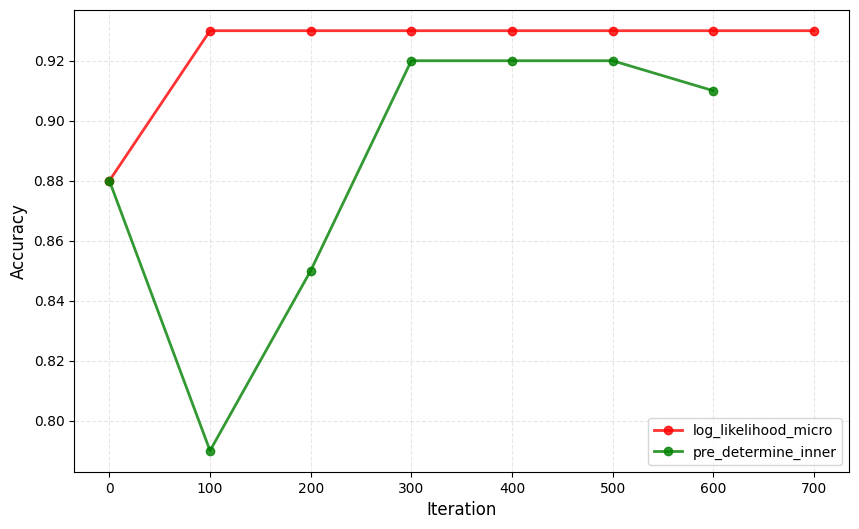

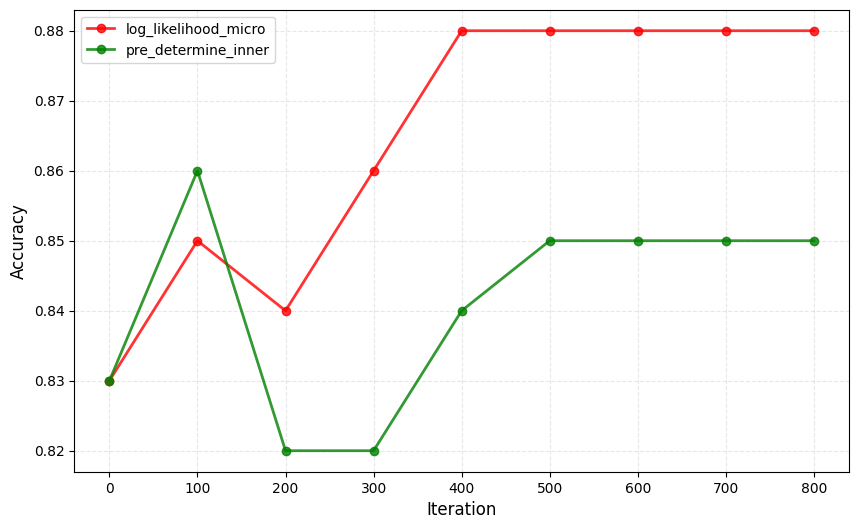

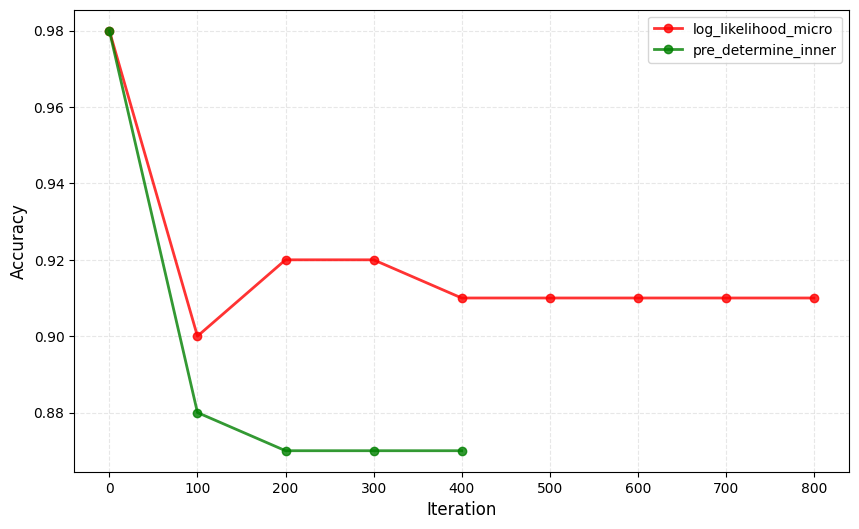

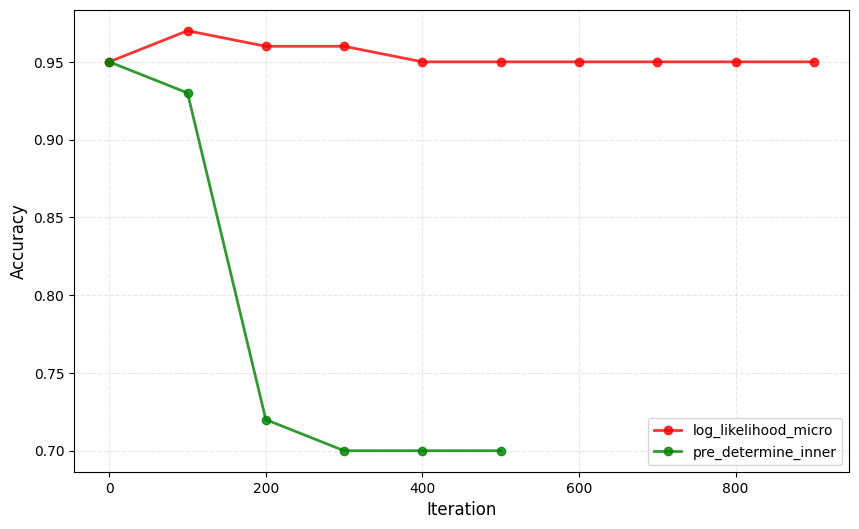

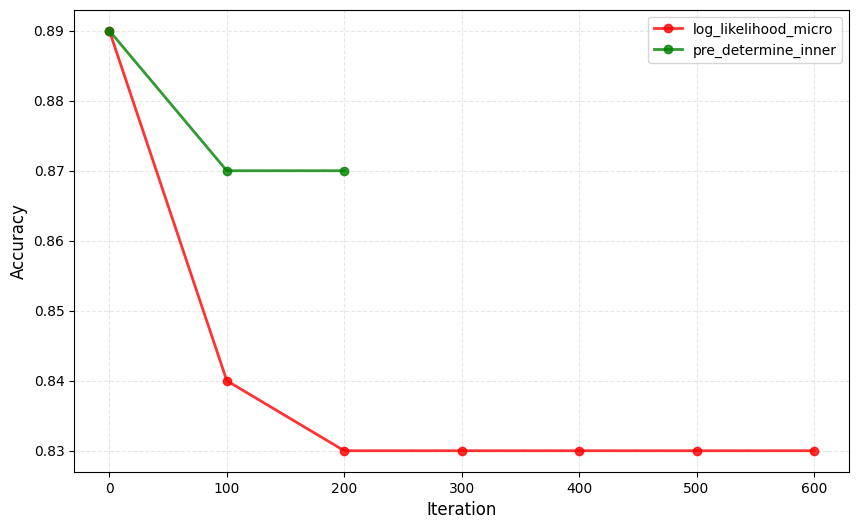

In [4]:
import matplotlib.pyplot as plt

for i in range(num_runs):
	tqfm_log = data['log_likelihood_micro'][i]
	tqfm_inner = data['pre_determine_inner'][i]

	# Plot SVC accuracy
	plt.figure(figsize=(10, 6))
	plt.plot(tqfm_log.accuracy_iteration_indices, tqfm_log.train_accuracy_history, 
				marker='o', linestyle='-', linewidth=2, markersize=6,
				color='red', label='log_likelihood_micro', alpha=0.8)
	
	plt.plot(tqfm_inner.accuracy_iteration_indices, tqfm_inner.train_accuracy_history, 
				marker='o', linestyle='-', linewidth=2, markersize=6,
				color='green', label='pre_determine_inner', alpha=0.8)
	


	plt.xlabel('Iteration', fontsize=12)
	plt.ylabel('Accuracy', fontsize=12)
	# plt.title('Classical SVC (kernel)', fontsize=14, fontweight='bold')
	plt.grid(True, alpha=0.3, linestyle='--')
	plt.legend(fontsize=10, loc='best')

In [8]:
from sklearn.datasets import make_moons
from src.kernel_estimate import KernelMatrix
from src.classifier import ClassicalClassifier

X, y = make_moons(n_samples=150, noise=0.2, random_state=42)

X_test1, y_test1 = make_moons(n_samples=200, noise=0.2, random_state=1)
X_test2, y_test2 = make_moons(n_samples=200, noise=0.2, random_state=2)
X_test3, y_test3 = make_moons(n_samples=200, noise=0.2, random_state=3)
X_test4, y_test4 = make_moons(n_samples=200, noise=0.2, random_state=4)
X_test5, y_test5 = make_moons(n_samples=200, noise=0.2, random_state=5)

mean_test_acc = {'log_likelihood_micro': [], 'pre_determine_inner': []}

for i in range(num_runs):
	tqfm_log = data['log_likelihood_micro'][i]
	tqfm_inner = data['pre_determine_inner'][i]
	
	# Skip if parameters are None
	if tqfm_log.best_params is None or tqfm_inner.best_params is None:
		print(f"Run {i+1}: Skipped (parameters are None)")
		continue

	kernel_train_log = KernelMatrix.compute_kernel_matrix_with_inner_products(X, X, tqfm_log.best_params, tqfm_log.circuit)
	kernel_log1 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test1, X, tqfm_log.best_params, tqfm_log.circuit)
	kernel_log2 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test2, X, tqfm_log.best_params, tqfm_log.circuit)
	kernel_log3 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test3, X, tqfm_log.best_params, tqfm_log.circuit)
	kernel_log4 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test4, X, tqfm_log.best_params, tqfm_log.circuit)
	kernel_log5 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test5, X,	 tqfm_log.best_params, tqfm_log.circuit)
	
	kernel_train_inner = KernelMatrix.compute_kernel_matrix_with_inner_products(X, X, tqfm_inner.best_params, tqfm_inner.circuit)
	kernel_inner1 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test1, X, tqfm_inner.best_params, tqfm_inner.circuit)
	kernel_inner2 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test2, X, tqfm_inner.best_params, tqfm_inner.circuit)
	kernel_inner3 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test3, X, tqfm_inner.best_params, tqfm_inner.circuit)
	kernel_inner4 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test4, X, tqfm_inner.best_params, tqfm_inner.circuit)
	kernel_inner5 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test5, X, tqfm_inner.best_params, tqfm_inner.circuit)


	train_acc_log1, test_acc_log1, model, _ = ClassicalClassifier.evaluate_model(kernel_train_log, kernel_log1	, y, y_test1)
	train_acc_log2, test_acc_log2, model, _ = ClassicalClassifier.evaluate_model(kernel_train_log, kernel_log2, y, y_test2)
	train_acc_log3, test_acc_log3, model, _ = ClassicalClassifier.evaluate_model(kernel_train_log, kernel_log3, y, y_test3)
	train_acc_log4, test_acc_log4, model, _ = ClassicalClassifier.evaluate_model(kernel_train_log, kernel_log4, y, y_test4)
	train_acc_log5, test_acc_log5, model, _ = ClassicalClassifier.evaluate_model(kernel_train_log, kernel_log5, y, y_test5)

	train_acc_inner1, test_acc_inner1, model, _ = ClassicalClassifier.evaluate_model(kernel_train_inner, kernel_inner1, y, y_test1)
	train_acc_inner2, test_acc_inner2, model, _ = ClassicalClassifier.evaluate_model(kernel_train_inner, kernel_inner2, y, y_test2)
	train_acc_inner3, test_acc_inner3, model, _ = ClassicalClassifier.evaluate_model(kernel_train_inner, kernel_inner3, y, y_test3)
	train_acc_inner4, test_acc_inner4, model, _ = ClassicalClassifier.evaluate_model(kernel_train_inner, kernel_inner4, y, y_test4)
	train_acc_inner5, test_acc_inner5, model, _ = ClassicalClassifier.evaluate_model(kernel_train_inner, kernel_inner5, y, y_test5)

	print(f"Run {i+1}:")
	mean_test_acc_log = np.mean([test_acc_log1, test_acc_log2, test_acc_log3, test_acc_log4, test_acc_log5])
	mean_test_acc_inner = np.mean([test_acc_inner1, test_acc_inner2, test_acc_inner3, test_acc_inner4, test_acc_inner5])

	print(f"  Log Likelihood Micro - Mean Test Accuracy: {mean_test_acc_log*100:.2f}%")
	print(f"  Inner Loss     - Mean Test Accuracy: {mean_test_acc_inner*100:.2f}%")

	mean_test_acc['log_likelihood_micro'].append(mean_test_acc_log)
	mean_test_acc['pre_determine_inner'].append(mean_test_acc_inner)


# Overall statistics
print("\n" + "="*70)
print("OVERALL STATISTICS")
print("="*70)

loss_names = ['log_likelihood_micro', 'pre_determine_inner']

for loss_name in loss_names:
	if mean_test_acc[loss_name]:
		overall_mean = np.mean(mean_test_acc[loss_name])
		overall_std = np.std(mean_test_acc[loss_name])
		print(f"{loss_name} - Mean Test Accuracy: {overall_mean*100:.2f}% ± {overall_std*100:.2f}% (n={len(mean_test_acc[loss_name])} runs)")
	else:
		print(f"{loss_name} - No valid runs")

Run 1:
  Log Likelihood Micro - Mean Test Accuracy: 92.00%
  Inner Loss     - Mean Test Accuracy: 91.80%
Run 2:
  Log Likelihood Micro - Mean Test Accuracy: 92.80%
  Inner Loss     - Mean Test Accuracy: 94.50%
Run 3: Skipped (parameters are None)
Run 4:
  Log Likelihood Micro - Mean Test Accuracy: 89.00%
  Inner Loss     - Mean Test Accuracy: 88.70%
Run 5:
  Log Likelihood Micro - Mean Test Accuracy: 93.20%
  Inner Loss     - Mean Test Accuracy: 83.20%
Run 6:
  Log Likelihood Micro - Mean Test Accuracy: 94.80%
  Inner Loss     - Mean Test Accuracy: 91.70%
Run 7:
  Log Likelihood Micro - Mean Test Accuracy: 88.20%
  Inner Loss     - Mean Test Accuracy: 66.60%
Run 8:
  Log Likelihood Micro - Mean Test Accuracy: 92.60%
  Inner Loss     - Mean Test Accuracy: 94.90%
Run 9:
  Log Likelihood Micro - Mean Test Accuracy: 89.10%
  Inner Loss     - Mean Test Accuracy: 89.10%
Run 10:
  Log Likelihood Micro - Mean Test Accuracy: 89.10%
  Inner Loss     - Mean Test Accuracy: 90.40%
Run 11:
  Log Lik

In [11]:
from sklearn.metrics.pairwise import rbf_kernel
from src.classifier import ClassicalClassifier

X, y = make_moons(n_samples=150, noise=0.2, random_state=42)

X_test1, y_test1 = make_moons(n_samples=200, noise=0.2, random_state=1)
X_test2, y_test2 = make_moons(n_samples=200, noise=0.2, random_state=2)
X_test3, y_test3 = make_moons(n_samples=200, noise=0.2, random_state=3)
X_test4, y_test4 = make_moons(n_samples=200, noise=0.2, random_state=4)
X_test5, y_test5 = make_moons(n_samples=200, noise=0.2, random_state=5)

rbf_K_train = rbf_kernel(X, X)
rbf_K_test1 = rbf_kernel(X_test1, X)
rbf_K_test2 = rbf_kernel(X_test2, X)
rbf_K_test3 = rbf_kernel(X_test3, X)
rbf_K_test4 = rbf_kernel(X_test4, X)
rbf_K_test5 = rbf_kernel(X_test5, X)

train_acc, test_acc1, model, best_c = ClassicalClassifier.evaluate_model(rbf_K_train, rbf_K_test1, y, y_test1)
train_acc, test_acc2, model, best_c = ClassicalClassifier.evaluate_model(rbf_K_train, rbf_K_test2, y, y_test2)
train_acc, test_acc3, model, best_c = ClassicalClassifier.evaluate_model(rbf_K_train, rbf_K_test3, y, y_test3)
train_acc, test_acc4, model, best_c = ClassicalClassifier.evaluate_model(rbf_K_train, rbf_K_test4, y, y_test4)
train_acc, test_acc5, model, best_c = ClassicalClassifier.evaluate_model(rbf_K_train, rbf_K_test5, y, y_test5)

rbf_mean_test_acc = np.mean([test_acc1, test_acc2, test_acc3, test_acc4, test_acc5])
print(f"RBF Kernel - Mean Test Accuracy: {rbf_mean_test_acc*100:.2f}%")

RBF Kernel - Mean Test Accuracy: 96.40%


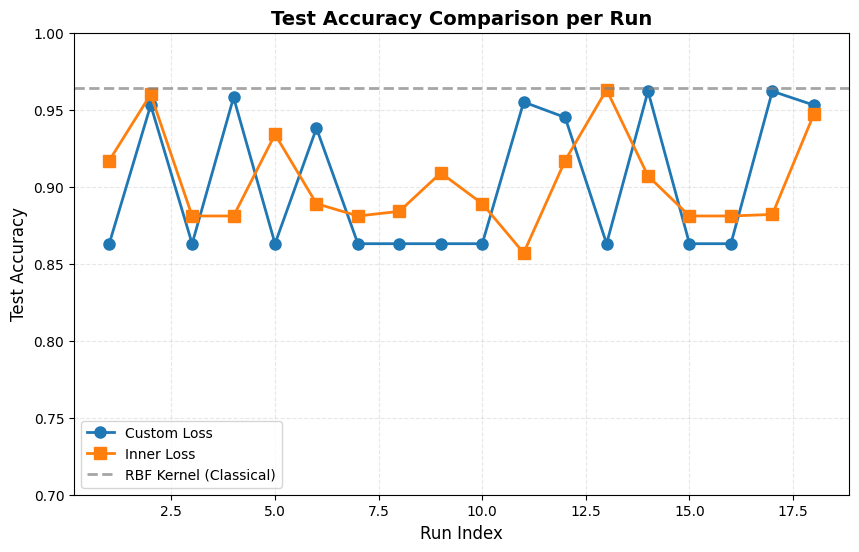

In [ ]:
# Plot accuracy comparison including RBF baseline
plt.figure(figsize=(10, 6))
x_indices = range(1, len(mean_test_acc['log_likelihood_micro']) + 1)
plt.plot(x_indices, mean_test_acc['log_likelihood_micro'], marker='o', label='Log Likelihood Micro', linewidth=2, markersize=8)
plt.plot(x_indices, mean_test_acc['inner_loss'], marker='s', label='Inner Loss', linewidth=2, markersize=8)
plt.axhline(y=rbf_mean_test_acc, color='gray', linestyle='--', linewidth=2, label='RBF Kernel (Classical)', alpha=0.7)
plt.xlabel('Run Index', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Test Accuracy Comparison per Run', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=10, loc='best')
plt.ylim([0.7, 1])
plt.show()

In [ ]:
from sklearn.datasets import make_moons
from src.classifier import QuantumClassifier

X, y = make_moons(n_samples=150, noise=0.2, random_state=42)

X_test1, y_test1 = make_moons(n_samples=200, noise=0.2, random_state=1)
X_test2, y_test2 = make_moons(n_samples=200, noise=0.2, random_state=2)
X_test3, y_test3 = make_moons(n_samples=200, noise=0.2, random_state=3)
X_test4, y_test4 = make_moons(n_samples=200, noise=0.2, random_state=4)
X_test5, y_test5 = make_moons(n_samples=200, noise=0.2, random_state=5)

mean_test_acc = {'custom_loss': [], 'trace_distance': [], 'hilbert_schmidt': [], 'inner_loss': []}

for i in range(num_runs):
	tqfm_cs = data['custom_loss'][i]
	tqfm_trace = data['trace_distance'][i]
	tqfm_hs = data['hilbert_schmidt'][i]
	tqfm_inner = data['inner_loss'][i]
	
	# Skip if parameters are None
	if tqfm_trace.best_params is None or tqfm_inner.best_params is None:
		print(f"Run {i+1}: Skipped (parameters are None)")
		continue

	qclf_cs = QuantumClassifier()
	qclf_cs.fit(tqfm_cs.best_rhos_qc_hs, tqfm_cs.circuit, tqfm_cs.best_params_qc_hs)
	test_acc_cs1 = qclf_cs.score(X_test1, y_test1, metric='trace_distance')
	test_acc_cs2 = qclf_cs.score(X_test2, y_test2, metric='trace_distance')
	test_acc_cs3 = qclf_cs.score(X_test3, y_test3, metric='trace_distance')
	test_acc_cs4 = qclf_cs.score(X_test4, y_test4, metric='trace_distance')
	test_acc_cs5 = qclf_cs.score(X_test5, y_test5, metric='trace_distance')

	qclf_trace = QuantumClassifier()
	qclf_trace.fit(tqfm_trace.best_rhos_qc_hs, tqfm_trace.circuit, tqfm_trace.best_params_qc_hs)
	test_acc_trace1 = qclf_trace.score(X_test1, y_test1, metric='trace_distance')
	test_acc_trace2 = qclf_trace.score(X_test2, y_test2, metric='trace_distance')
	test_acc_trace3 = qclf_trace.score(X_test3, y_test3, metric='trace_distance')
	test_acc_trace4 = qclf_trace.score(X_test4, y_test4, metric='trace_distance')
	test_acc_trace5 = qclf_trace.score(X_test5, y_test5, metric='trace_distance')

	qclf_hs = QuantumClassifier()
	qclf_hs.fit(tqfm_hs.best_rhos_qc_hs, tqfm_hs.circuit, tqfm_hs.best_params_qc_hs)
	test_acc_hs1 = qclf_hs.score(X_test1, y_test1, metric='trace_distance')
	test_acc_hs2 = qclf_hs.score(X_test2, y_test2, metric='trace_distance')
	test_acc_hs3 = qclf_hs.score(X_test3, y_test3, metric='trace_distance')
	test_acc_hs4 = qclf_hs.score(X_test4, y_test4, metric='trace_distance')
	test_acc_hs5 = qclf_hs.score(X_test5, y_test5, metric='trace_distance')
	
	qclf_inner = QuantumClassifier()
	qclf_inner.fit(tqfm_inner.best_rhos_qc_hs, tqfm_inner.circuit, tqfm_inner.best_params_qc_hs)
	test_acc_inner1 = qclf_inner.score(X_test1, y_test1, metric='trace_distance')
	test_acc_inner2 = qclf_inner.score(X_test2, y_test2, metric='trace_distance')
	test_acc_inner3 = qclf_inner.score(X_test3, y_test3, metric='trace_distance')
	test_acc_inner4 = qclf_inner.score(X_test4, y_test4, metric='trace_distance')
	test_acc_inner5 = qclf_inner.score(X_test5, y_test5, metric='trace_distance')

	print(f"Run {i+1}:")
	mean_test_acc_cs = np.mean([test_acc_cs1, test_acc_cs2, test_acc_cs3, test_acc_cs4, test_acc_cs5])
	mean_test_acc_trace = np.mean([test_acc_trace1, test_acc_trace2, test_acc_trace3, test_acc_trace4, test_acc_trace5])
	mean_test_acc_hs = np.mean([test_acc_hs1, test_acc_hs2, test_acc_hs3, test_acc_hs4, test_acc_hs5])
	mean_test_acc_inner = np.mean([test_acc_inner1, test_acc_inner2, test_acc_inner3, test_acc_inner4, test_acc_inner5])

	print(f"  Custom Loss   - Mean Test Accuracy: {mean_test_acc_cs*100:.2f}%")
	print(f"  Trace Distance - Mean Test Accuracy: {mean_test_acc_trace*100:.2f}%")
	print(f"  Hilbert-Schmidt - Mean Test Accuracy: {mean_test_acc_hs*100:.2f}%")
	print(f"  Inner Loss     - Mean Test Accuracy: {mean_test_acc_inner*100:.2f}%")

	mean_test_acc['custom_loss'].append(mean_test_acc_cs)
	mean_test_acc['trace_distance'].append(mean_test_acc_trace)
	mean_test_acc['hilbert_schmidt'].append(mean_test_acc_hs)
	mean_test_acc['inner_loss'].append(mean_test_acc_inner)


# Overall statistics
print("\n" + "="*70)
print("OVERALL STATISTICS")
print("="*70)
for loss_name in loss_names:
	if mean_test_acc[loss_name]:
		overall_mean = np.mean(mean_test_acc[loss_name])
		overall_std = np.std(mean_test_acc[loss_name])
		print(f"{loss_name} - Mean Test Accuracy: {overall_mean*100:.2f}% ± {overall_std*100:.2f}% (n={len(mean_test_acc[loss_name])} runs)")
	else:
		print(f"{loss_name} - No valid runs")

Run 1: Skipped (parameters are None)
Run 2:
  Trace Distance - Mean Test Accuracy: 95.80%
  Inner Loss     - Mean Test Accuracy: 86.70%
Run 3:
  Trace Distance - Mean Test Accuracy: 95.80%
  Inner Loss     - Mean Test Accuracy: 80.30%
Run 4:
  Trace Distance - Mean Test Accuracy: 96.40%
  Inner Loss     - Mean Test Accuracy: 90.40%
Run 5:
  Trace Distance - Mean Test Accuracy: 86.90%
  Inner Loss     - Mean Test Accuracy: 83.50%
Run 6:
  Trace Distance - Mean Test Accuracy: 94.60%
  Inner Loss     - Mean Test Accuracy: 85.10%
Run 7:
  Trace Distance - Mean Test Accuracy: 94.60%
  Inner Loss     - Mean Test Accuracy: 85.10%
Run 8:
  Trace Distance - Mean Test Accuracy: 96.20%
  Inner Loss     - Mean Test Accuracy: 90.30%
Run 9:
  Trace Distance - Mean Test Accuracy: 96.20%
  Inner Loss     - Mean Test Accuracy: 91.40%
Run 10:
  Trace Distance - Mean Test Accuracy: 96.20%
  Inner Loss     - Mean Test Accuracy: 86.80%
Run 11:
  Trace Distance - Mean Test Accuracy: 96.50%
  Inner Loss     

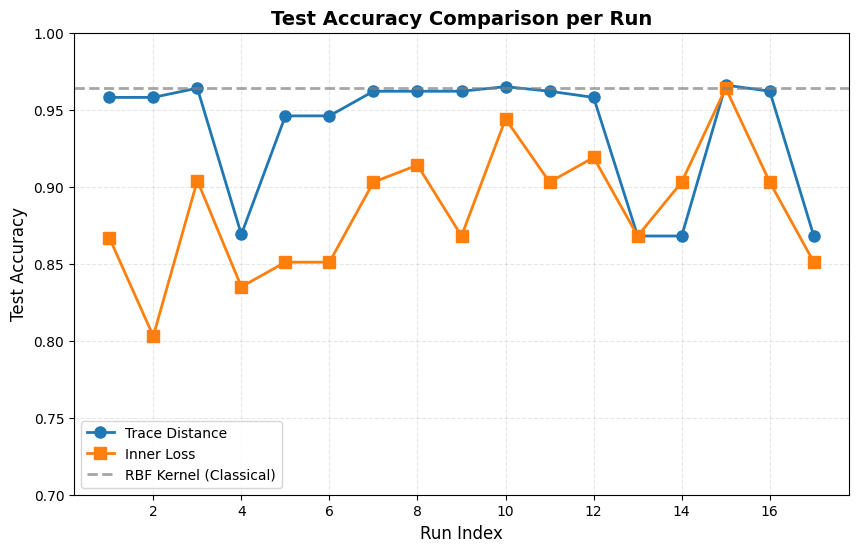

In [ ]:
# Plot accuracy comparison including RBF baseline
plt.figure(figsize=(10, 6))
x_indices = range(1, len(mean_test_acc['trace_distance']) + 1)
plt.plot(x_indices, mean_test_acc['custom_loss'], marker='o', label='Custom Loss', linewidth=2, markersize=8)
plt.plot(x_indices, mean_test_acc['trace_distance'], marker='o', label='Trace Distance', linewidth=2, markersize=8)
plt.plot(x_indices, mean_test_acc['hilbert_schmidt'], marker='^', label='Hilbert-Schmidt', linewidth=2, markersize=8)
plt.plot(x_indices, mean_test_acc['inner_loss'], marker='s', label='Inner Loss', linewidth=2, markersize=8)
plt.axhline(y=rbf_mean_test_acc, color='gray', linestyle='--', linewidth=2, label='RBF Kernel (Classical)', alpha=0.7)
plt.xlabel('Run Index', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Test Accuracy Comparison per Run', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=10, loc='best')
plt.ylim([0.7, 1])
plt.show()

# 2. Stable

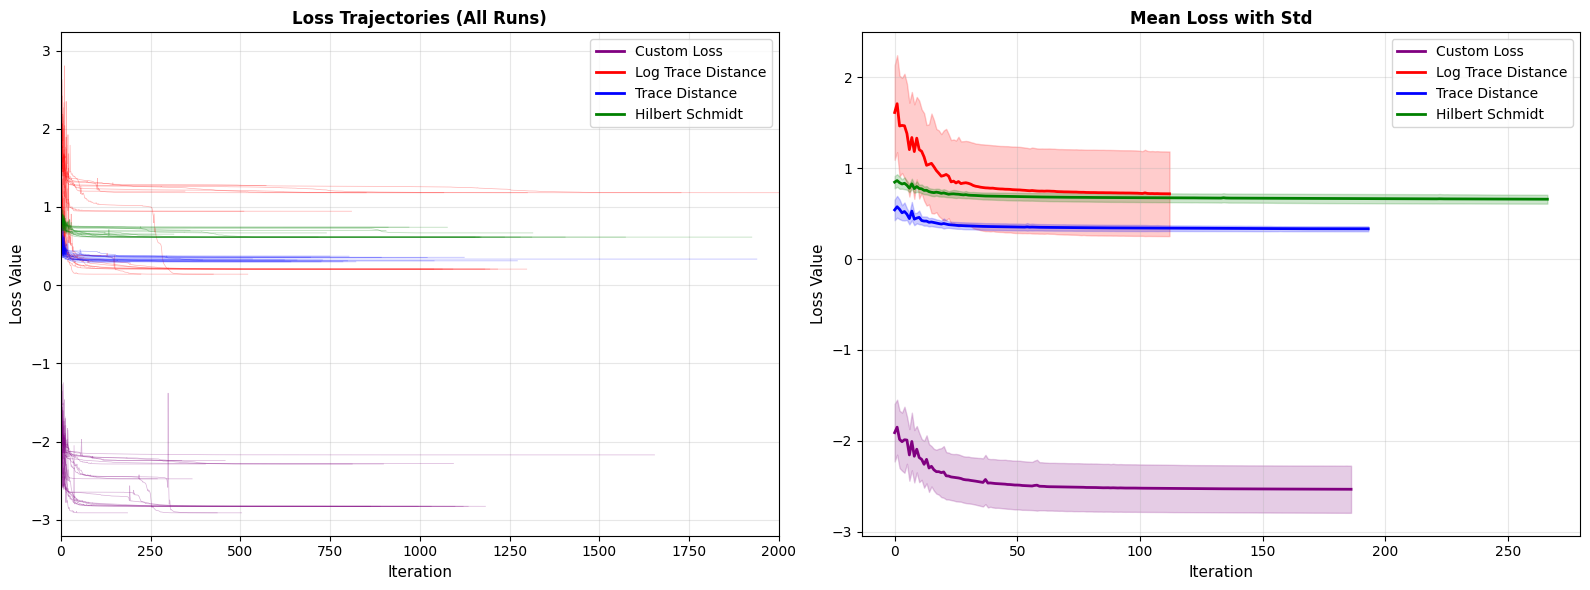

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_colors = {'custom_loss': 'purple', 'trace_distance': 'blue', 'hilbert_schmidt': 'green', 'log_trace_distance': 'red'}

# First subplot: Loss Trajectories (All Runs)
ax = axes[0]
for loss_name in loss_names:
	runs = data[loss_name]
	for run in runs:
		ax.plot(run.loss_history, alpha=0.3, color=plot_colors[loss_name], linewidth=0.5)
ax.set_xlabel('Iteration', fontsize=11)
ax.set_ylabel('Loss Value', fontsize=11)
ax.set_title('Loss Trajectories (All Runs)', fontsize=12, fontweight='bold')
ax.legend([plt.Line2D([0], [0], color=plot_colors[ln], lw=2) for ln in loss_names], 
		 [ln.replace('_', ' ').title() for ln in loss_names])
ax.set_xlim([0, 2000])
ax.grid(True, alpha=0.3)

# Second subplot: Mean Loss with Std
ax = axes[1]
for loss_name in loss_names:
	runs = data[loss_name]
	max_len = min([len(run.loss_history) for run in runs])
	trajectories = np.array([run.loss_history[:max_len] for run in runs])
	mean_traj = np.mean(trajectories, axis=0)
	std_traj = np.std(trajectories, axis=0)
	
	ax.plot(mean_traj, color=plot_colors[loss_name], linewidth=2, 
			label=loss_name.replace('_', ' ').title())
	ax.fill_between(range(len(mean_traj)), 
				   mean_traj - std_traj, 
				   mean_traj + std_traj, 
				   color=plot_colors[loss_name], alpha=0.2)

ax.set_xlabel('Iteration', fontsize=11)
ax.set_ylabel('Loss Value', fontsize=11)
ax.set_title('Mean Loss with Std', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



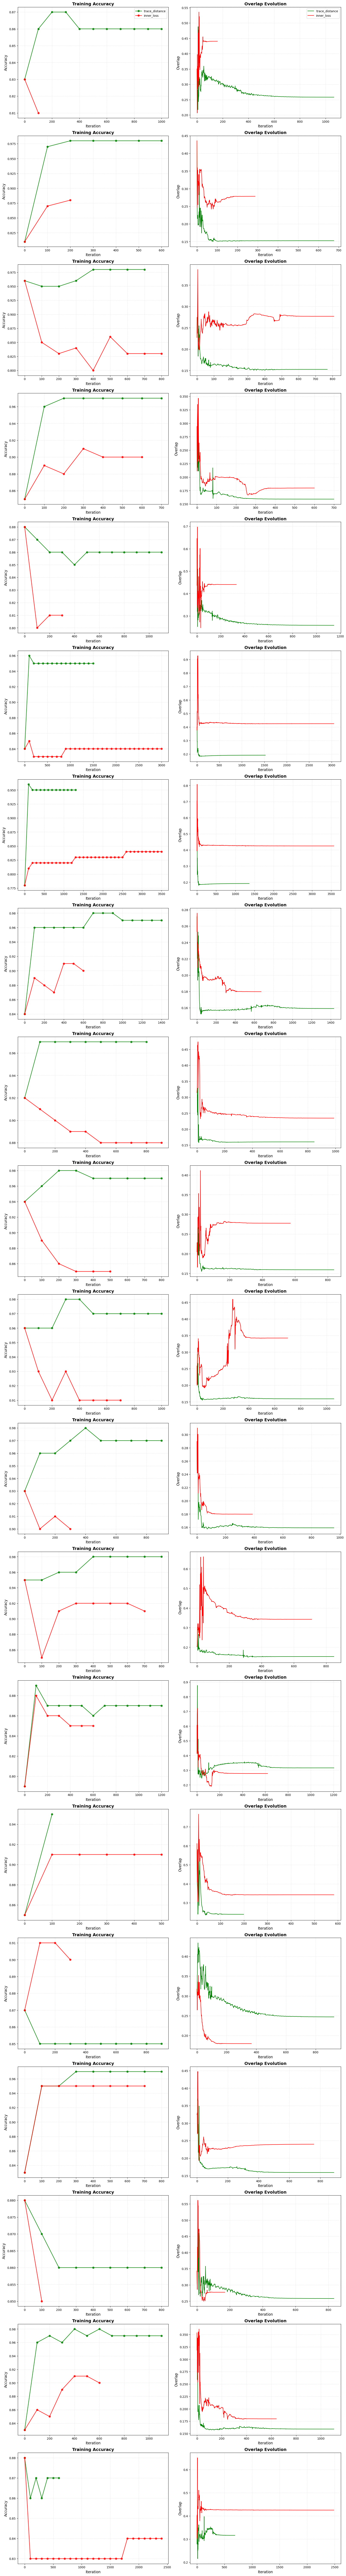

In [ ]:
fig, axes = plt.subplots(num_runs, 2, figsize=(16, 6*num_runs), constrained_layout=True)

for i in range(num_runs):
	tqfm_cs = data['custom_loss'][i]
	tqfm_trace = data['trace_distance'][i]
	tqfm_hs = data['hilbert_schmidt'][i]
	tqfm_inner = data['inner_loss'][i]

	# Plot 1: Accuracy
	ax = axes[i][0]
	ax.plot(tqfm_trace.accuracy_iteration_indices, tqfm_trace.train_accuracy_history, 
			marker='o', linestyle='-', linewidth=2, markersize=6,
			color='green', label='trace_distance' if i == 0 else '', alpha=0.8)
	
	ax.plot(tqfm_inner.accuracy_iteration_indices, tqfm_inner.train_accuracy_history, 
			marker='o', linestyle='-', linewidth=2, markersize=6,
			color='red', label='inner_loss' if i == 0 else '', alpha=0.8)
	
	ax.set_xlabel('Iteration', fontsize=12)
	ax.set_ylabel('Accuracy', fontsize=12)
	ax.set_title('Training Accuracy', fontsize=14, fontweight='bold')
	ax.grid(True, alpha=0.3, linestyle='--')
	if i == 0:
		ax.legend(fontsize=10, loc='best')

	# Plot 2: Distance
	ax = axes[i][1]
	ax.plot(tqfm_cs.cross_ovl, color='purple', label='custom_loss' if i == 0 else '')
	ax.plot(tqfm_trace.cross_ovl, color='green', label='trace_distance' if i == 0 else '')
	ax.plot(tqfm_hs.cross_ovl, color='blue', label='hilbert_schmidt' if i == 0 else '')
	ax.plot(tqfm_inner.cross_ovl, color='red', label='inner_loss' if i == 0 else '')
	
	ax.set_xlabel('Iteration', fontsize=12)
	ax.set_ylabel('Overlap', fontsize=12)
	ax.set_title('Overlap Evolution', fontsize=14, fontweight='bold')
	ax.grid(True, alpha=0.3, linestyle='--')
	if i == 0:
		ax.legend(fontsize=10, loc='best')

plt.show()